## Neural Net math

#### Given,

$H_1 = \begin{pmatrix} 1 & 0 \\ 1 & 0 \\ 0 & 1 \\ 0 & 1 \end{pmatrix}$ (weights for input to hidden layer 1)   $B_1 = \begin{pmatrix} 0.15 \\ 0.15 \\ 0.15 \\ 0.15 \end{pmatrix}$ (biases for hidden layer 1)

$H_2 = \begin{pmatrix} 1 \\ 1 \\ 0 \\ 1.5 \end{pmatrix}$ (weights for hidden to output layer 2)    $B_2 = \begin{pmatrix} 0 \end{pmatrix}$ (bias for output layer 2)

##### Learning rate = 10
##### Loss function = Mean squared error

## Calculating output of the network (via forward propagation) 
To calculate the output of the 1st hidden layer/ 2 input neurons I will use the following formula: 
$$ Z_1 = H_1^T X + B_1 $$
$$ Z_1 = \begin{pmatrix} 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1 \end{pmatrix}^T \begin{pmatrix} 1 \\ 0  \end{pmatrix} + \begin{pmatrix} 0.15 \\ 0.15 \\ 0.15 \\ 0.15 \end{pmatrix} $$
$$ Z_1 = \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0 \end{pmatrix} + \begin{pmatrix} 0.15 \\ 0.15 \\ 0.15 \\ 0.15 \end{pmatrix} = \begin{pmatrix} 1.15 \\ 0.15 \\ 1.15 \\ 0.15 \end{pmatrix}$$

As per the problem statement the activation function is tanh
To calculate the output after the activation function for the input neurons I will use the following formula for tanh:
$$ tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

So Applying the tanh activation function to get the input layer/ 2 neurons output( tanh function will be applied elementwise for each value of the vector Z_1 ):
$$ A_1 = \tanh(Z_1) $$
$$ A_1 = \begin{pmatrix} \tanh(1.15) \\ \tanh(0.15) \\ \tanh(1.15) \\ \tanh(0.15) \end{pmatrix} = \begin{pmatrix} 0.81775408 \\ 0.14888503 \\ 0.81775408 \\ 0.14888503 \end{pmatrix}$$ 

To calculate the output of the 2nd hidden layer/ 4 hidden neurons I will use the following formula: 
$$ Z_2 = H_2^T X + B_1 $$
$$ Z_2 = \begin{pmatrix} 1 \\ 1 \\ 0 \\ 1.5 \end{pmatrix}^T \begin{pmatrix} 0.81775408 \\ 0.14888503 \\ 0.81775408 \\ 0.14888503 \end{pmatrix} + \begin{pmatrix} 0 \end{pmatrix} = \begin{pmatrix} 1.18996666 \end{pmatrix} + \begin{pmatrix} 0 \end{pmatrix} = \begin{pmatrix} 1.18996666 \end{pmatrix}$$

So Applying the tanh activation function to get the hidden layer/ 4 neurons output( tanh function will be applied elementwise for each value of the vector Z_2 ):
$$ A_2 = \tanh(Z_2) $$
$$ A_2 = \begin{pmatrix} \tanh(1.18996666) \end{pmatrix} = 0.83056853 =0.831$$  

## Answer: 
#### the output of the network (via forward propagation) given an input of [1, 0]: 0.831 (As expected from the problem statement) 

## Calculating the new H2 and B2 matrices (via backward propogation)
Standard gradient descent equation for updating weights and bias is as follows:
$$ H_{new} = H_{old} - \alpha \cdot \frac{\partial E}{\partial H} $$
$$ B_{new} = B_{old} - \alpha \cdot \frac{\partial E}{\partial B} $$
Alpha is the learning rate 
For mean squared error the weights error and bias error as follows: 
$$ \frac{\partial E}{\partial H} = X^T \frac{\partial E}{\partial Y} \quad \text{and} \quad \frac{\partial E}{\partial B} = \frac{\partial E}{\partial Y}$$
Now tht loss function/ output error formula is as follows:
$$ \frac{\partial E}{\partial Y} = \frac{2}{n}(Y-Y^*)$$
Here Y is the actual label and Y* is the predicted label and n is the number of sample. We know the value of A2 which is the prediction value for the network and the value of Y (OR gate output for [1 0] input is 1). we can plug in the values in the output error for last activation layer formula as following:
$$ \frac{\partial E}{\partial Y} = \frac{2}{1}(1-A_2) = \frac{2}{1}(0.831-1) = \begin{pmatrix}-0.338\end{pmatrix}$$

Now the formula to calculate the input error to the activation layer using derivative of tanh function and the output error is as following:
$$ \frac{\partial E}{\partial x} = \frac{\partial E}{\partial Y}\odot f^\prime(x)$$
Now we will calculate derivative of tanh function with the value of Z2 which is input to the activation layer:
$$ f^\prime(x) = tanh^\prime(x) = tanh^\prime(Z_2) = = tanh^\prime(1.1899) = 1-(tanh(1.189))^2 =\begin{pmatrix}0.311\end{pmatrix} $$
So input error to the activation layer
$$ \frac{\partial E}{\partial x} = \frac{\partial E}{\partial Y}\odot f^\prime(x) = \begin{pmatrix}-0.338 \end{pmatrix} \odot \begin{pmatrix} 0.311\end{pmatrix} = \begin{pmatrix}-0.105\end{pmatrix} $$
This value is going to be the output error to the Fully connected layer before the activation layer. Now I will plug the value of output error and learning rate =10 in the bias and weight error equation:
$$ B_{new} = B_{old} - \alpha * \frac{\partial E}{\partial Y} = -10 *(-0.105) = 1.05$$
$$ B_2 = 1.05 $$

## Answer
#### The new B2 is B2 =1.05

Now following the same principle we will calculate weight error and the updated H2:
$$ \frac{\partial E}{\partial H} = X^T \frac{\partial E}{\partial Y} = (A_1)^T \frac{\partial E}{\partial Y} = \begin{pmatrix} 0.81775408 \\ 0.14888503 \\ 0.81775408 \\ 0.14888503 \end{pmatrix}^T * -0.105 = \begin{pmatrix} 0.085 & 0.015 & 0.085 & 0.015 \end{pmatrix} $$
Now Updating H2
$$ H_{new} = H_{old} - \alpha \cdot \frac{\partial E}{\partial H} => H_{2} = H_{2 old} - 10 * \begin{pmatrix} 0.085 & 0.015 & 0.085 & 0.015\end{pmatrix} = \begin{pmatrix} 1 & 1 & 0 & 1.5 \end{pmatrix} -\begin{pmatrix} 0.85 & 0.15 & 0.85 & 0.15\end{pmatrix} $$
$$ H_2 = \begin{pmatrix} 1.85 & 1.15 & 0.85 & 1.65 \end{pmatrix} $$
## Answer
#### The new H2 is [1.85 1.15 0.85 1.65]

# Answer to Question 2

## General testing of my implementation's fit and predict method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nnet import FCLayer, ActivationLayer, Network

In [2]:
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

Nnet = Network()
Nnet.add(FCLayer(2, 3))
Nnet.add(ActivationLayer(ActivationLayer.tanh, ActivationLayer.tanh_prime))
Nnet.add(FCLayer(3, 1))
Nnet.add(ActivationLayer(ActivationLayer.tanh, ActivationLayer.tanh_prime))

Nnet.fit(X, Y, epochs=10, learning_rate=0.1, propogation_op=False)

Epoch 1/10 completed. Training error: 4.605769301596112
Epoch 2/10 completed. Training error: 4.23999875828495
Epoch 3/10 completed. Training error: 4.056387615672711
Epoch 4/10 completed. Training error: 4.083031723720738
Epoch 5/10 completed. Training error: 3.9993136619164638
Epoch 6/10 completed. Training error: 4.032342038135992
Epoch 7/10 completed. Training error: 3.9545941733771284
Epoch 8/10 completed. Training error: 3.9584623080110966
Epoch 9/10 completed. Training error: 3.863820220616657
Epoch 10/10 completed. Training error: 3.820217535027145


10/10 epochs completed


In [3]:
Nnet.predict(X)

Predictions:
Input: [0 0] => Prediction: 0
Input: [0 1] => Prediction: 1
Input: [1 0] => Prediction: 0
Input: [1 1] => Prediction: 0


## Individual test for each layer class

### Manual Calculation for the layers and forward and backward propogation

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)

# Manual calculations for expected outputs and updates
X = np.array([[1], [2]])  # Simple input vector (2x1)
W = np.array([[0.1, 0.2], [0.3, 0.4]])  # weights for FCLayer (2x2)
b = np.array([[0.5], [0.6]])  # bias for FCLayer (2x1)
dE_dY = np.array([[1], [-1]])  # error gradient for backward propagation (2x1)
learning_rate = 0.01

# Expected forward propagation output for FCLayer
Y_expected = np.dot(W, X) + b

# Expected backward propagation updates for FCLayer
dE_dW_expected = np.dot(dE_dY, X.T)
dE_db_expected = dE_dY
W_updated_expected = W - learning_rate * dE_dW_expected
b_updated_expected = b - learning_rate * dE_db_expected
dE_dX_expected = np.dot(W.T, dE_dY)

# Expected forward propagation output for ActivationLayer using sigmoid
Y_sigmoid_expected = sigmoid(X)

# Expected backward propagation output for ActivationLayer
dE_dX_sigmoid_expected = dE_dY * sigmoid_prime(X)

Y_expected, W_updated_expected, b_updated_expected, dE_dX_expected, Y_sigmoid_expected, dE_dX_sigmoid_expected


(array([[1. ],
        [1.7]]),
 array([[0.09, 0.18],
        [0.31, 0.42]]),
 array([[0.49],
        [0.61]]),
 array([[-0.2],
        [-0.2]]),
 array([[0.73105858],
        [0.88079708]]),
 array([[ 0.19661193],
        [-0.10499359]]))

### Calculation using the implemented layer classes

In [5]:
fc_layer_test = FCLayer(input_size=2, output_size=2)
fc_layer_test.weights = W  
fc_layer_test.bias = b    

fc_layer_output_test = fc_layer_test.forward_propagation(X)


fc_layer_input_error_test = fc_layer_test.backward_propagation(dE_dY, learning_rate)


activation_layer_test = ActivationLayer(sigmoid, sigmoid_prime)
activation_layer_output_test = activation_layer_test.forward_propagation(X)
activation_layer_input_error_test = activation_layer_test.backward_propagation(dE_dY, learning_rate)

fc_layer_output_test, fc_layer_test.weights, fc_layer_test.bias, fc_layer_input_error_test, activation_layer_output_test, activation_layer_input_error_test

(array([[1. ],
        [1.7]]),
 array([[0.09, 0.18],
        [0.31, 0.42]]),
 array([[0.49],
        [0.61]]),
 array([[-0.22],
        [-0.24]]),
 array([[0.73105858],
        [0.88079708]]),
 array([[ 0.19661193],
        [-0.10499359]]))

### From both sets of output from the manual calculation and implementation output we see all the corresponding values match up. So both the layer classes are functioning as expected

## Testing network class using the structure in the neural net math section at the top of the notebook

In [6]:
# Setting number of neurons, weight and bias for Dense layer 1
layer_1 = FCLayer(input_size=2, output_size=4, name='layer_1')
layer_1.weights = np.array([
    [1.0, 0.0, 1.0, 0.0], 
    [0.0, 1.0, 0.0, 1.0]]).T.astype(np.float64)
layer_1.bias = np.array([
    [0.15], [0.15], [0.15], [0.15]]).astype(np.float64)
# Setting Activation layer after layer 1
layer_1_activation = ActivationLayer(ActivationLayer.tanh, ActivationLayer.tanh_prime, name='layer_1_activation')

# Setting number of neurons, weight and bias for Dense layer 2
layer_2 = FCLayer(input_size=4, output_size=1, name='layer_2')
layer_2.weights = np.array([
    [1.0], [1.0], [0.0], [1.5]]).T.astype(np.float64)
layer_2.bias = np.array([
    [0.0]]).astype(np.float64)
# Setting Activation layer after layer 2
layer_2_activation = ActivationLayer(ActivationLayer.tanh, ActivationLayer.tanh_prime, name='layer_2_activation')

Nnet_test = Network()
Nnet_test.add(layer_1)
Nnet_test.add(layer_1_activation)
Nnet_test.add(layer_2)
Nnet_test.add(layer_2_activation)

# Input of [1,0] and output 1 as described in problem 1
X = np.reshape([[1, 0]], (1, 2, 1))
Y = np.reshape([[1]], (1, 1, 1))

Nnet_test.fit(X, Y, epochs=1, learning_rate=10.0, propogation_op=True)

Forward propogation output for layer_1: 
[[1.15]
 [0.15]
 [1.15]
 [0.15]]

Forward propogation output for layer_1_activation: 
[[0.81775408]
 [0.14888503]
 [0.81775408]
 [0.14888503]]

Forward propogation output for layer_2: 
[[1.18996666]]

Forward propogation output for layer_2_activation: 
[[0.83056853]]

Backpropagation output for layer_2:
 Weights: [[1.85946238 1.15647869 0.85946238 1.65647869]]
 Bias:[1.05100347]

Backpropagation output for layer_1:
 Weights: [[1.64741759 0.        ]
 [1.18852025 1.        ]
 [1.29924298 0.        ]
 [1.70237331 1.        ]]
 Bias:[0.79741759]

Epoch 1/1 completed. Training error: 0.028707023414130534


1/1 epochs completed


#### Results comparison with structure provided in part1
from the output of each layer for forward and back propogation we can see that the output of the network which is "Forward propogation output for layer_2_activation" is 0.83056853 from our network which is equal to 0.831 from the answer provided in queestion 1.

from the output of each layer for forward and back propogation we can see that updated $H_2$ and $B_2$ matrices of the network which is "Backpropagation output for layer_2" weights is [1.85946238 1.15647869 0.85946238 1.65647869] and Bias is [1.05] which is equal to the answers provided in question 1

## Generating Validation Loss curve for an Exclusive Or function

In [7]:
# Generating data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([[0], [1], [1], [0]])

# Replicating the data and reshaping it to prepare for the network 
X_xor_replicated = np.tile(X_xor, (250, 1))
Y_xor_replicated = np.tile(Y_xor, (250, 1))

X_train = np.reshape(X_xor_replicated[200:], (800,2,1))
y_train = np.reshape(Y_xor_replicated[200:], (800,1,1))
X_val = np.reshape(X_xor_replicated[:200], (200,2,1))
y_val = np.reshape(Y_xor_replicated[:200], (200,1,1))

In [8]:
Nnet_xor = Network()
Nnet_xor.add(FCLayer(2, 3))
Nnet_xor.add(ActivationLayer(ActivationLayer.tanh, ActivationLayer.tanh_prime))
Nnet_xor.add(FCLayer(3, 1))
Nnet_xor.add(ActivationLayer(ActivationLayer.tanh, ActivationLayer.tanh_prime))

In [9]:
Nnet_xor.fit(X=X_train, Y=y_train, epochs=5, learning_rate=0.1, X_val=X_val, Y_val=y_val, propogation_op=False)

Epoch 1/5 completed. Training error: 192.65308316883886
Epoch 2/5 completed. Training error: 3.421530717549656
Epoch 3/5 completed. Training error: 0.6300391332444852
Epoch 4/5 completed. Training error: 0.3452442565454389
Epoch 5/5 completed. Training error: 0.23471815293089188


5/5 epochs completed


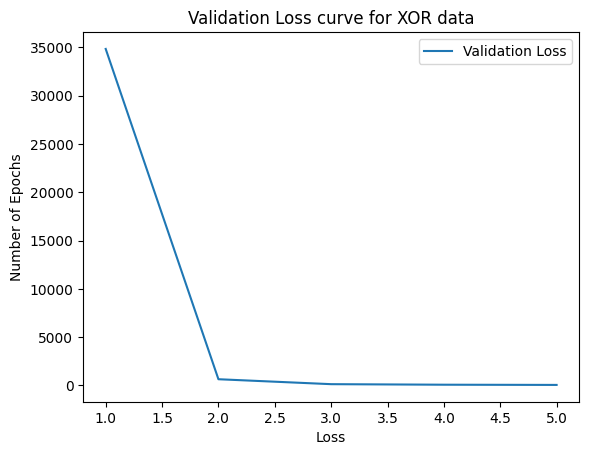

In [10]:
indices = range(1, len(Nnet_xor.train_loss) + 1)

plt.plot(indices, Nnet_xor.validation_loss, label='Validation Loss')  
plt.legend()
plt.xlabel("Loss")
plt.ylabel("Number of Epochs")
plt.title('Validation Loss curve for XOR data')
plt.show()

## Generating Validation Loss curves for classifying data as stress/not stressed.

In [16]:
# Generating the stressed and non stressed data and reshaping it to prepare for the network 
not_streesed_mu = np.array([60, 50])
not_streesed_cov = np.array([[1, 1], [1, 1]])
stressed_mu = np.array([120, 35])
stressed_cov = np.array([[1, 0], [0, 1]])

not_streesed_data = np.round(np.random.multivariate_normal(not_streesed_mu, not_streesed_cov, 200))
stressed_data = np.round(np.random.multivariate_normal(stressed_mu, stressed_cov, 200))

not_streesed_df = pd.DataFrame(not_streesed_data, columns=['Feature1', 'Feature2'])
not_streesed_df['Labels'] = 0
stressed_df = pd.DataFrame(stressed_data, columns=['Feature1', 'Feature2'])
stressed_df['Labels'] = 1

dataframe = pd.concat([not_streesed_df, stressed_df], ignore_index=True)

In [12]:
from sklearn.model_selection import train_test_split

X = dataframe[['Feature1', 'Feature2']].values 
y = dataframe['Labels'].values  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=60)

X_train = np.reshape(X_train, (340,2,1))
X_val = np.reshape(X_val, (60,2,1))
y_train = np.reshape(y_train, (340,1,1))
y_val = np.reshape(y_val, (60,1,1))

In [13]:
Nnet_stress = Network()
Nnet_stress.add(FCLayer(2, 3))
Nnet_stress.add(ActivationLayer(ActivationLayer.tanh, ActivationLayer.tanh))
Nnet_stress.add(FCLayer(3, 1))
Nnet_stress.add(ActivationLayer(ActivationLayer.tanh, ActivationLayer.tanh_prime))

In [14]:
Nnet_stress.fit(X=X_train, Y=y_train, epochs=20, learning_rate=0.01, X_val=X_val, Y_val=y_val, propogation_op=False)

Epoch 1/20 completed. Training error: 158.45189812264414
Epoch 2/20 completed. Training error: 117.56446970005048
Epoch 3/20 completed. Training error: 114.5429027673337
Epoch 4/20 completed. Training error: 26.17794438316824
Epoch 5/20 completed. Training error: 14.16848174942785
Epoch 6/20 completed. Training error: 7.2195142873861835
Epoch 7/20 completed. Training error: 4.825512813919317
Epoch 8/20 completed. Training error: 2.7567302381322896
Epoch 9/20 completed. Training error: 1.4007022875204678
Epoch 10/20 completed. Training error: 2.3791711163399367
Epoch 11/20 completed. Training error: 1.2957019965631622
Epoch 12/20 completed. Training error: 1.2557188438139306
Epoch 13/20 completed. Training error: 1.2370548478614125
Epoch 14/20 completed. Training error: 1.2166125273464807
Epoch 15/20 completed. Training error: 1.2002601890818907
Epoch 16/20 completed. Training error: 1.186601974870405
Epoch 17/20 completed. Training error: 0.13344301985450105
Epoch 18/20 completed. Trai

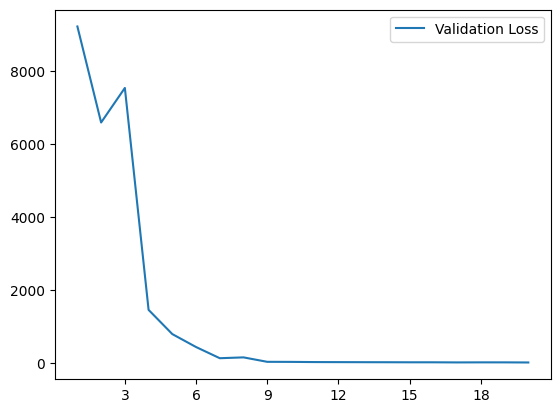

In [15]:
from matplotlib.ticker import MaxNLocator

indices = range(1, len(Nnet_stress.train_loss) + 1)

plt.plot(indices, Nnet_stress.validation_loss, label= 'Validation Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()